In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
car = pd.read_csv('carclaims.csv')
car.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [4]:
car.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
car_cat = car.select_dtypes(object)
car_num = car.select_dtypes("int64")
car_cat

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability,No
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,No
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision,No
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,No
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,Yes
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability,No
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision,Yes
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils,No


In [6]:
car_num

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,1,12,300,1,1994
1,3,4,34,2,15,400,4,1994
2,5,2,47,3,7,400,3,1994
3,2,1,65,4,4,400,2,1994
4,5,2,27,5,3,400,1,1994
...,...,...,...,...,...,...,...,...
15415,4,5,35,15416,5,400,4,1996
15416,5,1,30,15417,11,400,3,1996
15417,5,1,24,15418,4,400,4,1996
15418,1,2,34,15419,6,400,4,1996


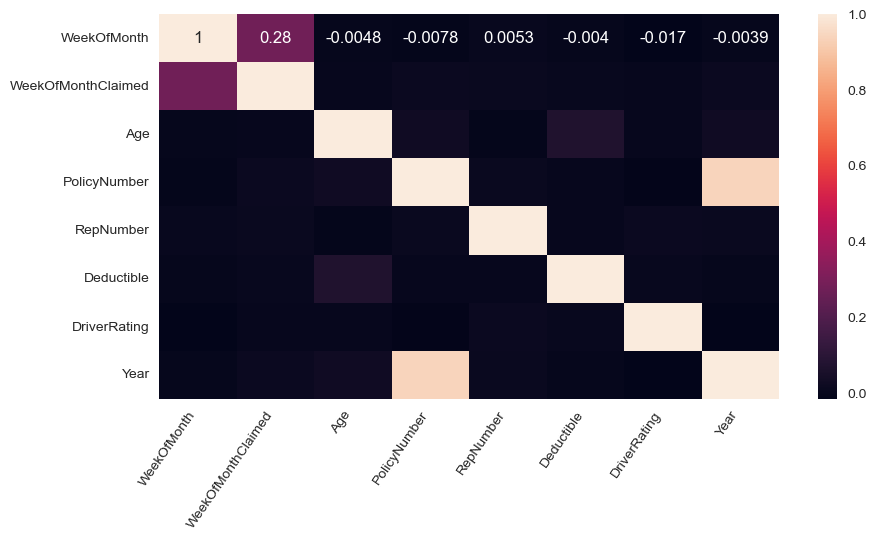

In [7]:
car_num.corr()
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(car_num.corr(), annot=True)
plt.xticks(rotation = 55, horizontalalignment='right')
plt.show()

In [8]:
for column in car:
    print(column,":\n",car[column].unique(),'\n')

Month :
 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

WeekOfMonth :
 [5 3 2 4 1] 

DayOfWeek :
 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make :
 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea :
 ['Urban' 'Rural'] 

DayOfWeekClaimed :
 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed :
 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

WeekOfMonthClaimed :
 [1 4 2 3 5] 

Sex :
 ['Female' 'Male'] 

MaritalStatus :
 ['Single' 'Married' 'Widow' 'Divorced'] 

Age :
 [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault :
 ['Policy Holder' 'Third Party'] 

PolicyType :

In [34]:
car_cat["FraudFound"].value_counts()

FraudFound
No     14497
Yes      923
Name: count, dtype: int64

In [38]:
car[['Year',"FraudFound"]].value_counts()

Year  FraudFound
1994  No            5733
1995  No            4894
1996  No            3870
1994  Yes            409
1995  Yes            301
1996  Yes            213
Name: count, dtype: int64

In [9]:
num_feat = car.select_dtypes(include=[np.number])
num_feat.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [10]:
cat_feat = car.select_dtypes(include=[object])
cat_feat.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [13]:
le = LabelEncoder()

cols = car.select_dtypes('O').columns

car[cols]= car[cols].apply(le.fit_transform)

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int32
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int32
 3   Make                  15420 non-null  int32
 4   AccidentArea          15420 non-null  int32
 5   DayOfWeekClaimed      15420 non-null  int32
 6   MonthClaimed          15420 non-null  int32
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int32
 9   MaritalStatus         15420 non-null  int32
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int32
 12  PolicyType            15420 non-null  int32
 13  VehicleCategory       15420 non-null  int32
 14  VehiclePrice          15420 non-null  int32
 15  PolicyNumber          15420 non-null  int64
 16  RepN

In [16]:
clf1 = setup(data = car, target = 'FraudFound')

,Description,Value
0,Session id,5946
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 33)"
4,Transformed data shape,"(15420, 33)"
5,Transformed train set shape,"(10794, 33)"
6,Transformed test set shape,"(4626, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [26]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [17]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9514,0.9565,0.3052,0.7204,0.4274,0.4065,0.4484,0.4970
catboost,CatBoost Classifier,0.9480,0.9591,0.1736,0.8102,0.2835,0.2683,0.3578,8.1420
lightgbm,Light Gradient Boosting Machine,0.9469,0.9359,0.1643,0.7604,0.2693,0.2536,0.3371,1.2320
gbc,Gradient Boosting Classifier,0.9417,0.8849,0.0341,0.8417,0.0648,0.0604,0.1568,2.6280
rf,Random Forest Classifier,0.9403,0.8486,0.0062,0.3500,0.0121,0.0110,0.0433,0.9900
ridge,Ridge Classifier,0.9402,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0410
lda,Linear Discriminant Analysis,0.9402,0.7907,0.0016,0.1000,0.0031,0.0027,0.0114,0.0760
et,Extra Trees Classifier,0.9402,0.8334,0.0093,0.4500,0.0181,0.0162,0.0591,1.1670
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2240
lr,Logistic Regression,0.9397,0.7835,0.0016,0.1000,0.0031,0.0018,0.0085,1.7880


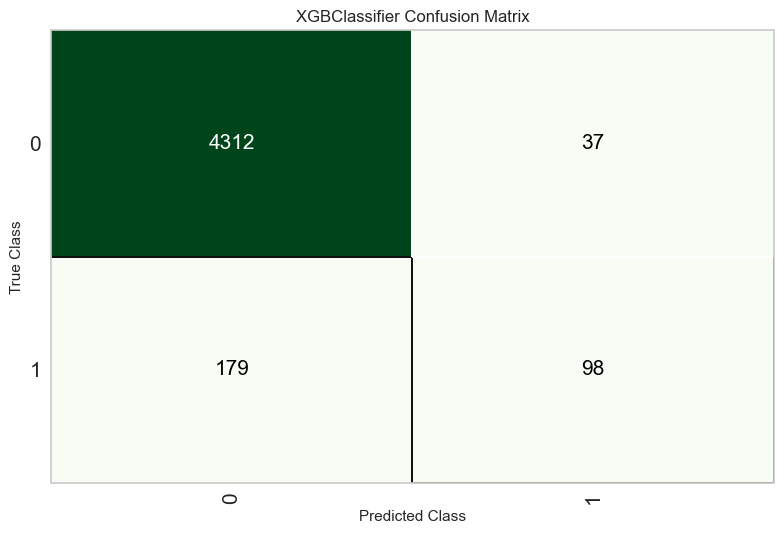

In [18]:
plot_model(best_model, plot = 'confusion_matrix')

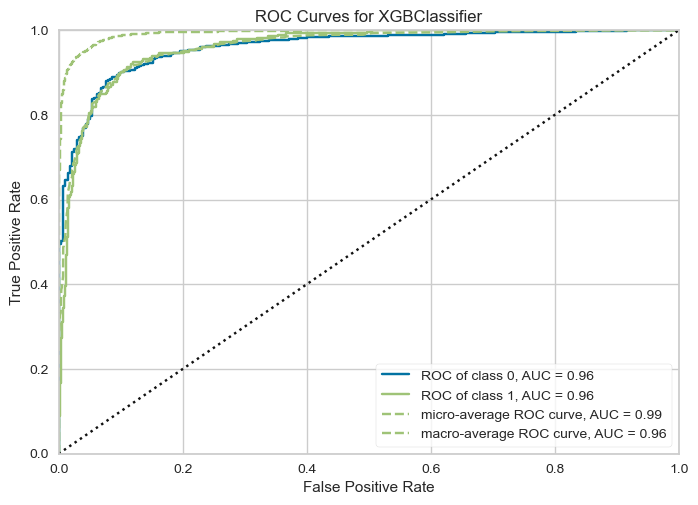

In [19]:
plot_model(best_model, plot = 'auc')

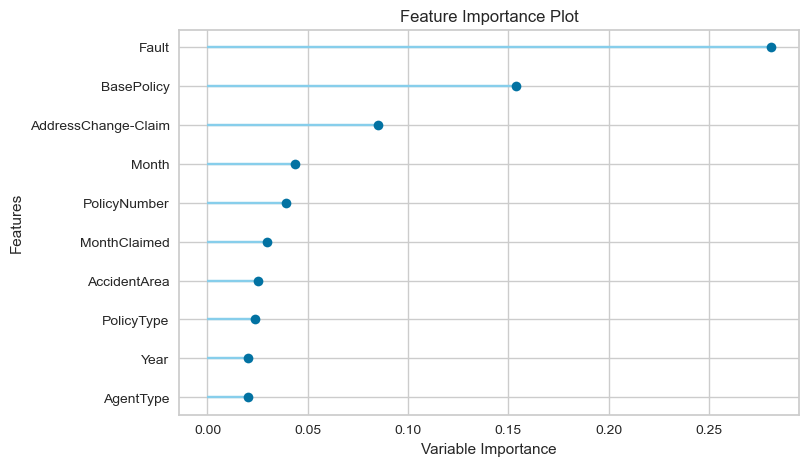

In [20]:
plot_model(best_model, plot = 'feature')

In [21]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
holdout_pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9533,0.9597,0.3538,0.7259,0.4757,0.4543,0.4867


In [31]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9481,0.9468,0.2923,0.6552,0.4043,0.3813,0.4156
1,0.9519,0.9679,0.3231,0.7241,0.4468,0.4255,0.4637
2,0.9491,0.9644,0.2923,0.6786,0.4086,0.3864,0.4242
3,0.9509,0.9484,0.2769,0.7500,0.4045,0.3845,0.4373
4,0.9574,0.9641,0.3750,0.8000,0.5106,0.4914,0.5303
5,0.9555,0.9613,0.3594,0.7667,0.4894,0.4693,0.5064
6,0.9518,0.9510,0.3125,0.7143,0.4348,0.4136,0.4526
7,0.9527,0.9572,0.3438,0.7097,0.4632,0.4415,0.4735
8,0.9500,0.9584,0.2615,0.7391,0.3864,0.3664,0.4211


In [28]:
tuned_dt = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9472,0.9341,0.4308,0.5833,0.4956,0.4684,0.4744
1,0.9565,0.9651,0.5538,0.6667,0.6050,0.5822,0.5850
2,0.9435,0.9523,0.4615,0.5357,0.4959,0.4661,0.4676
3,0.9519,0.9328,0.4308,0.6512,0.5185,0.4943,0.5060
4,0.9592,0.9498,0.5625,0.6923,0.6207,0.5994,0.6030
5,0.9462,0.9566,0.4375,0.5600,0.4912,0.4633,0.4672
6,0.9509,0.9351,0.5000,0.6038,0.5470,0.5213,0.5239
7,0.9481,0.9509,0.4688,0.5769,0.5172,0.4901,0.4931
8,0.9527,0.9557,0.5077,0.6346,0.5641,0.5394,0.5432


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


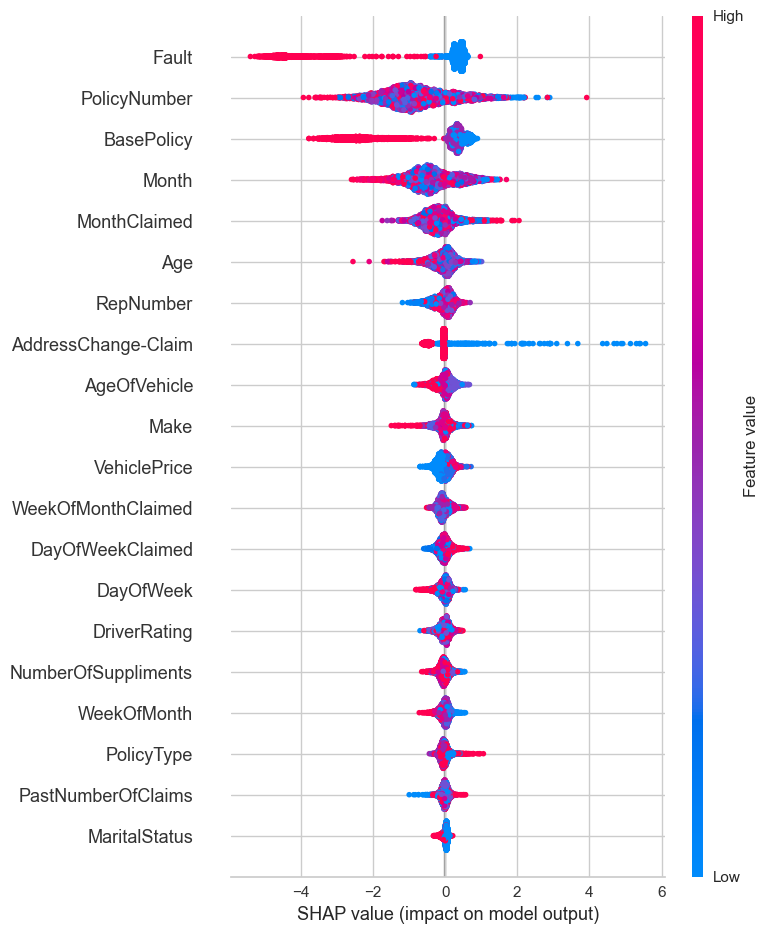

In [33]:
interpret_model(xg)

In [29]:
boosted_dt = ensemble_model(best_model, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9398,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9398,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9398,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9398,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9407,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9407,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9407,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9407,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9398,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [30]:
pred1 = predict_model(boosted_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9401,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [23]:
holdout_pred.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,prediction_label,prediction_score
2730,0,2,2,6,0,2,1,2,1,2,...,0,0,3,0,1,1994,1,0,1,0.8063
11805,4,1,5,13,1,5,5,1,1,1,...,0,0,3,3,0,1996,0,0,0,1.0000
7859,0,4,0,2,1,7,1,4,0,1,...,0,0,2,3,0,1995,1,0,0,1.0000
12868,8,3,0,17,1,1,7,2,1,2,...,0,0,3,3,0,1996,1,0,0,0.9696
213,1,2,4,13,1,7,2,3,1,1,...,0,0,0,3,0,1994,0,0,0,0.9921


In [24]:
save_model(best_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Month', 'WeekOfMonth',
                                              'DayOfWeek', 'Make',
                                              'AccidentArea', 'DayOfWeekClaimed',
                                              'MonthClaimed',
                                              'WeekOfMonthClaimed', 'Sex',
                                              'MaritalStatus', 'Age', 'Fault',
                                              'PolicyType', 'VehicleCategory',
                                              'VehiclePrice', 'PolicyNumber',
                                              'RepNumber', 'Deductible',
                                              'DriverRat...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
         

In [25]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\nicky\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Month', 'WeekOfMonth',
                                             'DayOfWeek', 'Make',
                                             'AccidentArea', 'DayOfWeekClaimed',
                                             'MonthClaimed',
                                             'WeekOfMonthClaimed', 'Sex',
                                             'MaritalStatus', 'Age', 'Fault',
                                             'PolicyType', 'VehicleCategory',
                                             'VehiclePrice', 'PolicyNum...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

In [50]:
clf1 = setup(data = car, target = 'FraudFound', feature_selection=True, feature_selection_method= 'univariate', fix_imbalance=True)

,Description,Value
0,Session id,5053
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 33)"
4,Transformed data shape,"(24922, 7)"
5,Transformed train set shape,"(20296, 7)"
6,Transformed test set shape,"(4626, 7)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [51]:
model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9402,0.7604,0.0000,0.0000,0.0000,0.0000,0.0000,0.3850
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1600
et,Extra Trees Classifier,0.9401,0.7642,0.0000,0.0000,0.0000,-0.0002,-0.0008,0.1630
dt,Decision Tree Classifier,0.9382,0.7601,0.0141,0.0231,0.0175,0.0136,0.0141,0.0380
rf,Random Forest Classifier,0.9382,0.7622,0.0203,0.1897,0.0295,0.0242,0.0429,0.1890
xgboost,Extreme Gradient Boosting,0.9380,0.7646,0.0141,0.0231,0.0175,0.0132,0.0125,0.0960
catboost,CatBoost Classifier,0.9380,0.7639,0.0141,0.0225,0.0173,0.0132,0.0130,3.5010
knn,K Neighbors Classifier,0.9348,0.6102,0.0154,0.0848,0.0235,0.0127,0.0167,0.6780
gbc,Gradient Boosting Classifier,0.9314,0.7683,0.0341,0.1434,0.0502,0.0319,0.0411,0.3310
ada,Ada Boost Classifier,0.9006,0.7708,0.1317,0.1432,0.1300,0.0805,0.0827,0.1400


In [37]:
pit = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9401,0.8014,0.0000,0.0000,0.0000,0.0000,0.0000


In [38]:
pit.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,prediction_label,prediction_score
3026,9,5,5,6,1,6,10,5,1,1,...,0,0,1,3,0,1994,2,0,0,0.9905
8446,8,3,0,2,1,7,7,2,1,1,...,0,0,3,3,2,1995,1,0,0,0.9116
11092,7,2,1,17,1,7,9,1,1,1,...,0,0,3,3,0,1995,0,0,0,0.9852
15056,10,3,1,9,1,6,11,3,1,2,...,0,0,0,3,0,1996,1,0,0,0.9892
8586,9,3,5,2,1,5,10,4,1,1,...,0,0,3,3,0,1995,0,0,0,0.8377


In [41]:
selected_features = get_config('X_transformed').columns
print(selected_features)

Index(['Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'AddressChange-Claim', 'BasePolicy'],
      dtype='object')


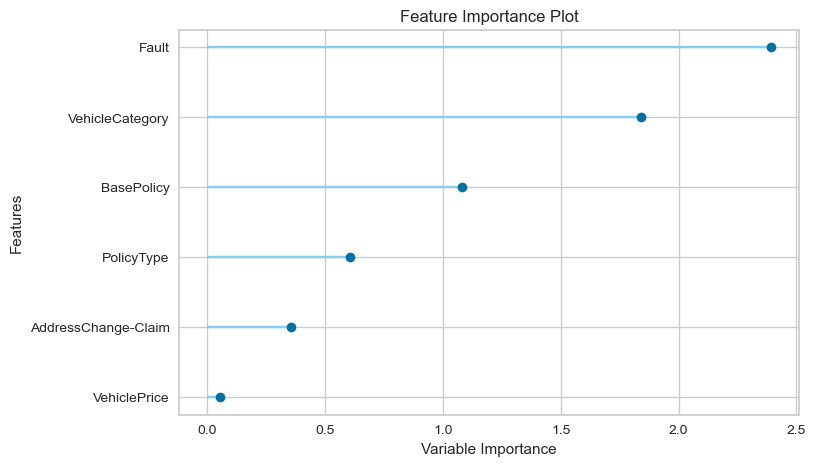

In [42]:
plot_model(model, plot = 'feature')

In [55]:
clf1 = setup(data = car, target = 'FraudFound', ordinal_features = {'MaritalStatus' : ['Single', 'Married','Divorced','Widow']},categorical_features = ['Fault','VehiclePrice','PolicyType','AddressChange-Claim','AccidentArea'])

,Description,Value
0,Session id,8028
1,Target,FraudFound
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(15420, 33)"
5,Transformed data shape,"(15420, 49)"
6,Transformed train set shape,"(10794, 49)"
7,Transformed test set shape,"(4626, 49)"
8,Ordinal features,3
9,Numeric features,8


In [56]:
best_model1=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9490,0.9439,0.9490,0.9430,0.9335,0.2890,0.3755,0.3580
dummy,Dummy Classifier,0.9402,0.5000,0.9402,0.8839,0.9112,0.0000,0.0000,0.1000


In [56]:
df = car[['Fault','VehiclePrice','PolicyType','AddressChange-Claim','AccidentArea','FraudFound']]
df.head()

,Fault,VehiclePrice,PolicyType,AddressChange-Claim,AccidentArea,FraudFound
0,0,5,5,0,1,0
1,0,5,4,3,1,0
2,0,5,4,3,1,0
3,1,0,2,3,0,0
4,1,5,4,3,1,0


In [57]:
df['FraudFound'].value_counts()

FraudFound
0    14497
1      923
Name: count, dtype: int64

In [58]:
clf1 = setup(data = df, target = 'FraudFound')

,Description,Value
0,Session id,6499
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 6)"
4,Transformed data shape,"(15420, 6)"
5,Transformed train set shape,"(10794, 6)"
6,Transformed test set shape,"(4626, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [59]:
model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9407,0.8013,0.0325,0.6000,0.0604,0.0547,0.1234,0.0120
et,Extra Trees Classifier,0.9407,0.8050,0.0310,0.5967,0.0577,0.0523,0.1211,0.0710
catboost,CatBoost Classifier,0.9407,0.8174,0.0310,0.5817,0.0576,0.0521,0.1182,0.9620
lightgbm,Light Gradient Boosting Machine,0.9405,0.8195,0.0325,0.5917,0.0605,0.0544,0.1233,0.2740
gbc,Gradient Boosting Classifier,0.9404,0.8240,0.0264,0.5983,0.0504,0.0451,0.1151,0.0560
xgboost,Extreme Gradient Boosting,0.9404,0.8198,0.0325,0.5567,0.0608,0.0545,0.1211,0.0290
lr,Logistic Regression,0.9402,0.7262,0.0000,0.0000,0.0000,0.0000,0.0000,0.7970
svm,SVM - Linear Kernel,0.9402,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
ridge,Ridge Classifier,0.9402,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
rf,Random Forest Classifier,0.9402,0.8101,0.0356,0.5667,0.0658,0.0586,0.1247,0.0990


In [61]:
final_model = model
final_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=6499, splitter='best')

In [62]:
clf2 = setup(data = df, target = 'FraudFound',fix_imbalance=True)

,Description,Value
0,Session id,3760
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 6)"
4,Transformed data shape,"(24922, 6)"
5,Transformed train set shape,"(20296, 6)"
6,Transformed test set shape,"(4626, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [63]:
test=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
knn,K Neighbors Classifier,0.9256,0.6203,0.0682,0.1972,0.0964,0.0670,0.0784,0.0600
lr,Logistic Regression,0.6305,0.7265,0.7167,0.1089,0.1888,0.0949,0.1665,0.0230
et,Extra Trees Classifier,0.6291,0.8002,0.8962,0.1283,0.2245,0.1338,0.2445,0.1120
svm,SVM - Linear Kernel,0.6284,0.0000,0.6618,0.1165,0.1856,0.0961,0.1557,0.0230
dt,Decision Tree Classifier,0.6278,0.7989,0.8947,0.1277,0.2235,0.1327,0.2431,0.0300
lightgbm,Light Gradient Boosting Machine,0.6273,0.8092,0.9024,0.1284,0.2248,0.1341,0.2462,0.3450
rf,Random Forest Classifier,0.6266,0.8009,0.8947,0.1274,0.2230,0.1321,0.2424,0.1340
catboost,CatBoost Classifier,0.6266,0.8077,0.8977,0.1277,0.2236,0.1327,0.2438,3.1980
xgboost,Extreme Gradient Boosting,0.6241,0.8083,0.9055,0.1278,0.2239,0.1329,0.2457,0.0680


In [91]:
final_model = test
final_model

DummyClassifier(constant=None, random_state=6769, strategy='prior')

In [64]:
clf3 = setup(data = df, target = 'FraudFound',fix_imbalance=True, fix_imbalance_method='randomundersampler')

,Description,Value
0,Session id,4460
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 6)"
4,Transformed data shape,"(5918, 6)"
5,Transformed train set shape,"(1292, 6)"
6,Transformed test set shape,"(4626, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [65]:
test1=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
knn,K Neighbors Classifier,0.6887,0.7769,0.7411,0.1316,0.2226,0.1349,0.2152,0.0540
lr,Logistic Regression,0.6409,0.7273,0.7104,0.1110,0.1919,0.0986,0.1696,0.0160
dt,Decision Tree Classifier,0.6208,0.8062,0.9258,0.1289,0.2262,0.1354,0.2527,0.0120
et,Extra Trees Classifier,0.6170,0.8030,0.9197,0.1271,0.2233,0.1320,0.2478,0.0500
xgboost,Extreme Gradient Boosting,0.6142,0.8032,0.9272,0.1270,0.2233,0.1319,0.2495,0.0730
rf,Random Forest Classifier,0.6141,0.8062,0.9350,0.1278,0.2248,0.1336,0.2529,0.1050
catboost,CatBoost Classifier,0.6114,0.8124,0.9458,0.1282,0.2257,0.1345,0.2561,0.3660
lightgbm,Light Gradient Boosting Machine,0.6081,0.8079,0.9458,0.1272,0.2242,0.1327,0.2542,0.1690
gbc,Gradient Boosting Classifier,0.6073,0.8182,0.9536,0.1277,0.2252,0.1338,0.2571,0.0240


In [66]:
clf4 = setup(data = df, target = 'FraudFound',fix_imbalance=True, fix_imbalance_method='randomoversampler')

,Description,Value
0,Session id,8176
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 6)"
4,Transformed data shape,"(24922, 6)"
5,Transformed train set shape,"(20296, 6)"
6,Transformed test set shape,"(4626, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [67]:
test2=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
knn,K Neighbors Classifier,0.9354,0.6518,0.0447,0.2587,0.0755,0.0596,0.0853,0.0520
lr,Logistic Regression,0.6370,0.7231,0.7070,0.1091,0.1888,0.0951,0.1657,0.0170
rf,Random Forest Classifier,0.6189,0.7953,0.9072,0.1265,0.2220,0.1307,0.2434,0.1390
catboost,CatBoost Classifier,0.6185,0.8018,0.9087,0.1266,0.2222,0.1308,0.2439,2.6710
lightgbm,Light Gradient Boosting Machine,0.6181,0.8026,0.9118,0.1267,0.2225,0.1312,0.2450,0.2810
xgboost,Extreme Gradient Boosting,0.6176,0.8025,0.9102,0.1264,0.2220,0.1306,0.2440,0.0880
et,Extra Trees Classifier,0.6172,0.7947,0.9087,0.1261,0.2215,0.1301,0.2431,0.0840
dt,Decision Tree Classifier,0.6163,0.7959,0.9056,0.1256,0.2205,0.1290,0.2412,0.0150
gbc,Gradient Boosting Classifier,0.6052,0.8119,0.9396,0.1259,0.2220,0.1302,0.2499,0.0850
